In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

<h2>Introduction</h2>
<div></div>
<h3>Problem Statement</h3><div></div>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

<h3>My Model Approach</h3>
Though it is abinary classification problem this kind of health related problem can be well surrounded by KNN as most of the health parameter of a victim belongs to more or less in same zone. So I am using KNN Algo here may be later we can try different Algo also like Neural Nets,Logits etc.


<h2>Modules Importing</h2>

In [1]:
import pandas as pd #to play with in memory dataset
import numpy as np #to do math
import matplotlib.pyplot as plt#general plot expert
import seaborn as sns #distribution expert
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

<h2>Data Loading And Basic data utils </h2>

In [2]:
df=pd.read_csv("../input/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
x=df.columns.values
print("The variable/parameters are {}".format( x[:-1]))
print("The outcome or target is {}".format(x[-1]))

The variable/parameters are ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
The outcome or target is Outcome


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we know the dataset target variable is binary object but how the dataset is distributed if it is even or biased towards some class let's find out 

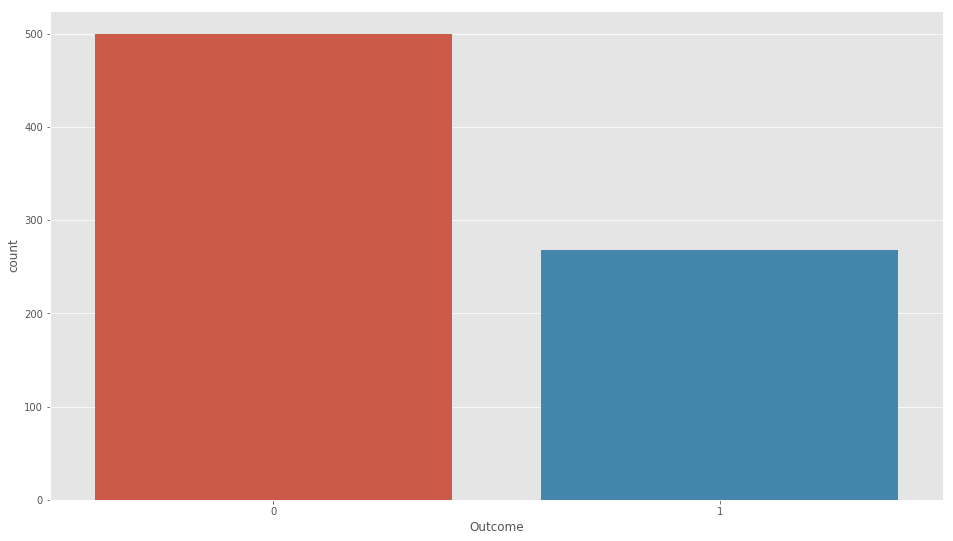

In [16]:
plt.figure(figsize=(16,9))
sns.countplot(df["Outcome"])

Not even again not completely biased.
<div></div>
from .info() we can see there is no null hope for us also.

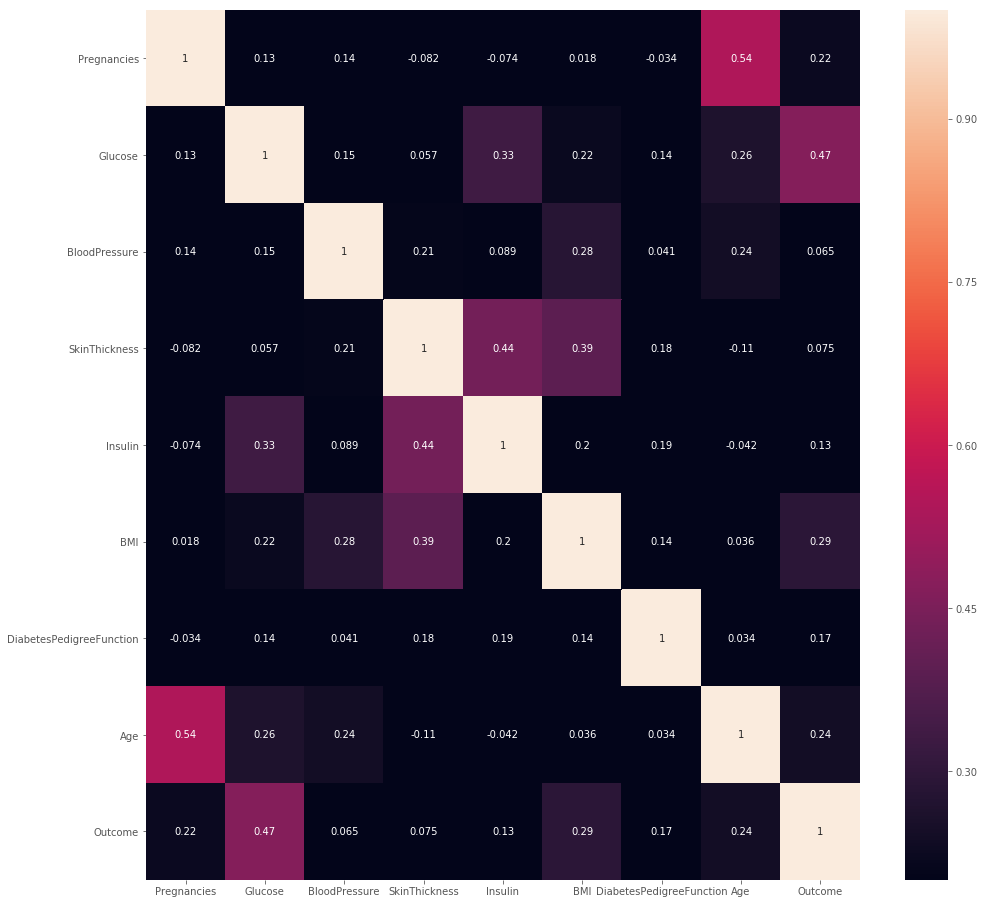

In [17]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,vmin=0.2)

<h3>Findings</h3>
* outcome has a medium correlation with Glucose (true in sense of healthcare)
* Glucose has also medium correlation with insulin and BMI (again true)
* Age has a medium relation with pregneancy which is quite obvious as the older you are the more chance you have to commit mistake wow!

<Figure size 1152x648 with 0 Axes>

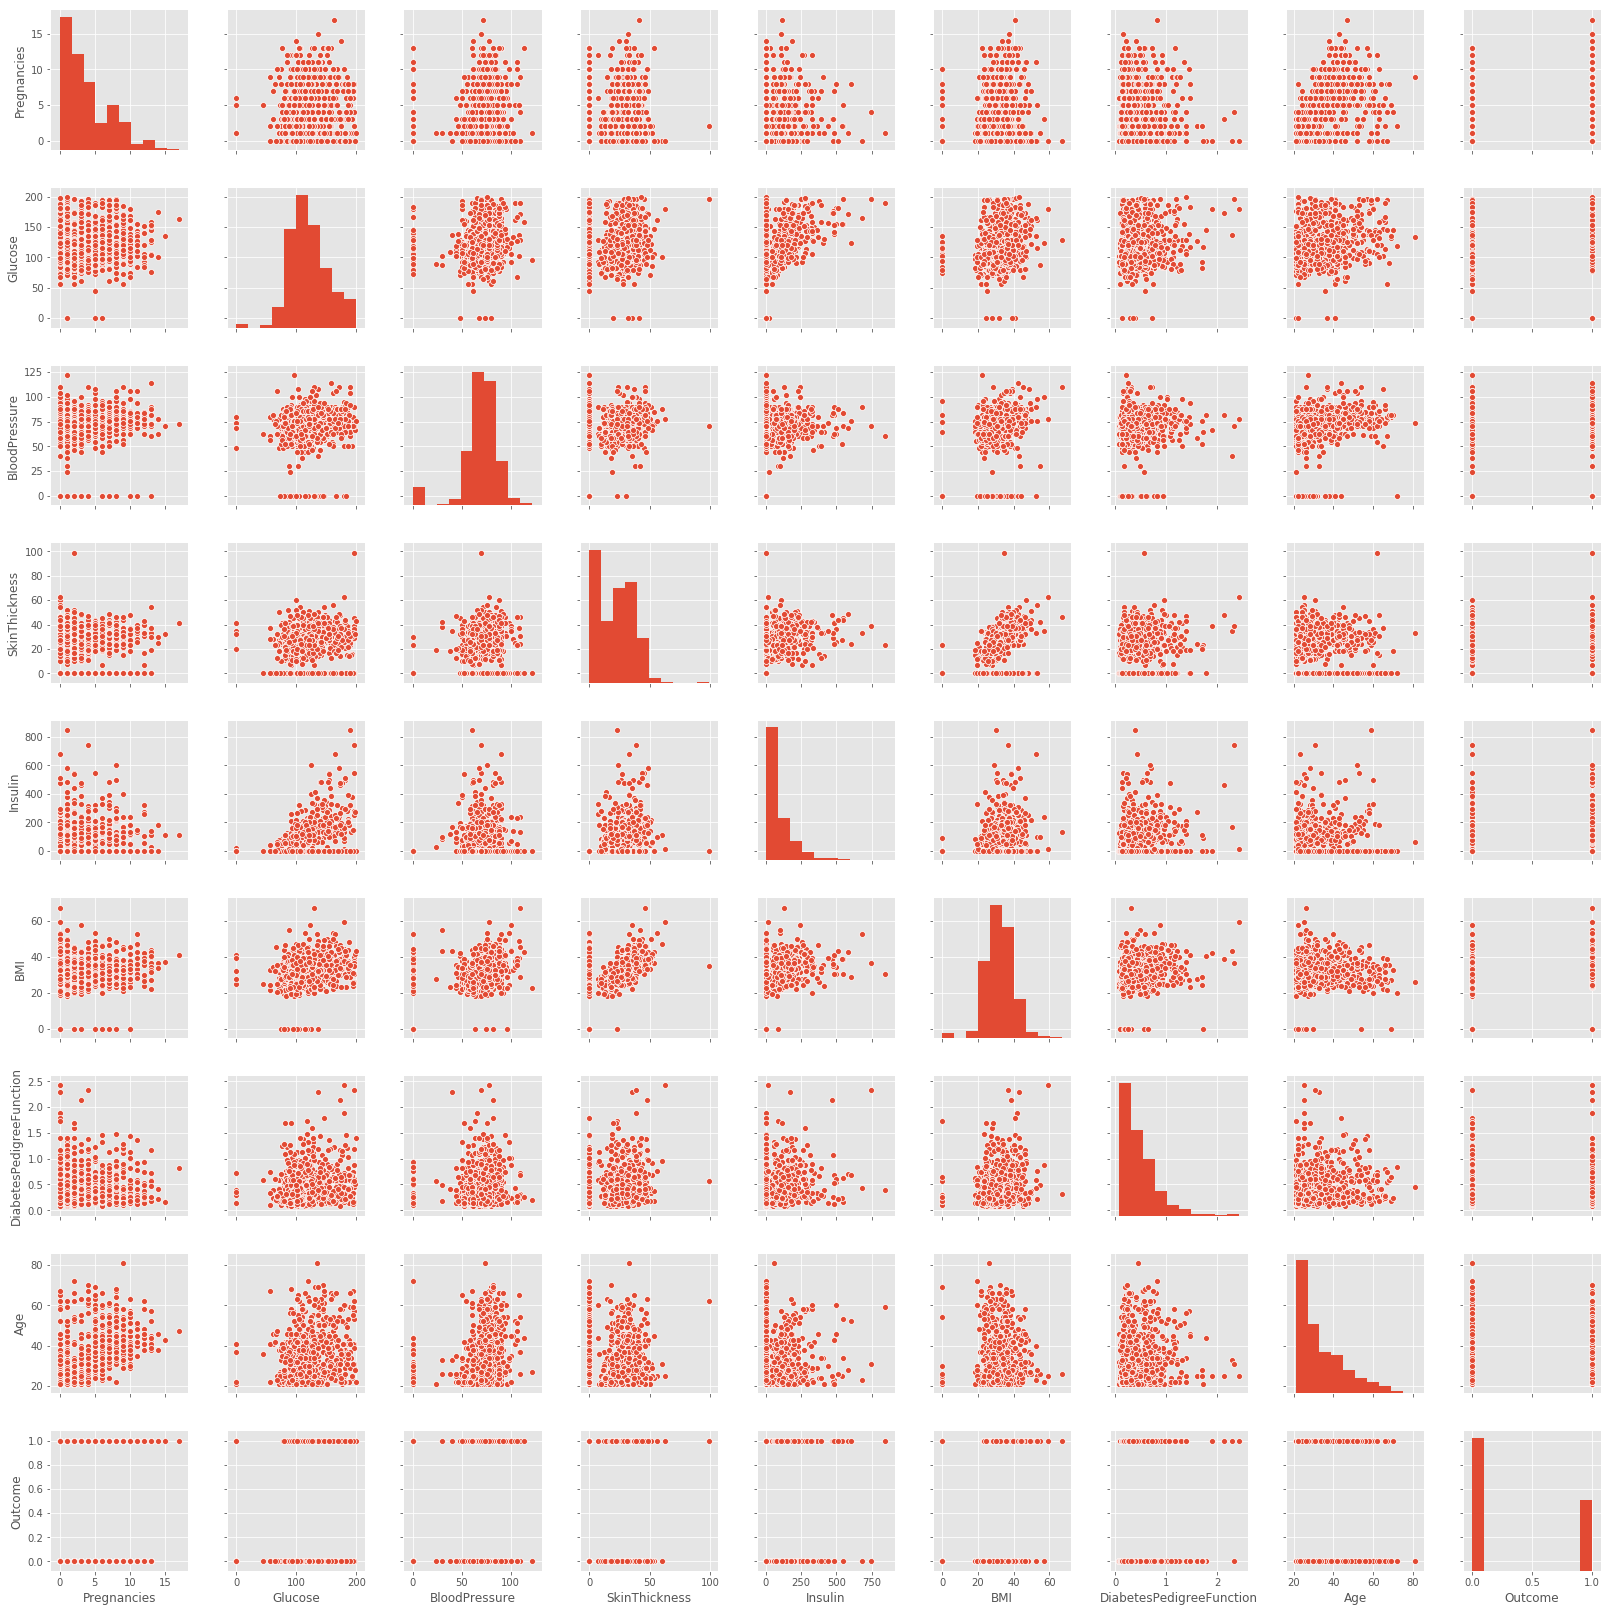

In [21]:
plt.figure(figsize=(16,9))
sns.pairplot(df)

I genuinely ignore this plot in each of my kernel as it feels like devops so many things I won't understand

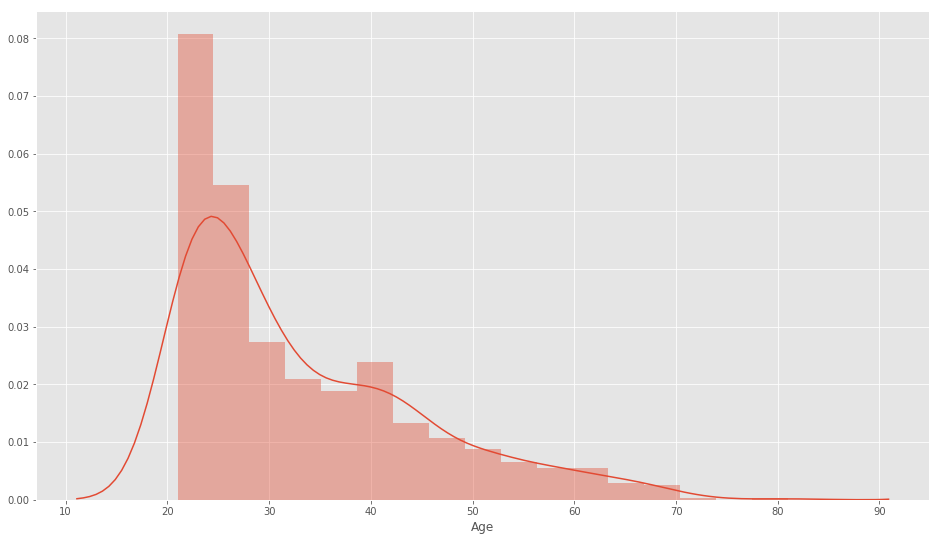

In [24]:
plt.figure(figsize=(16,9))
sns.distplot(df["Age"])

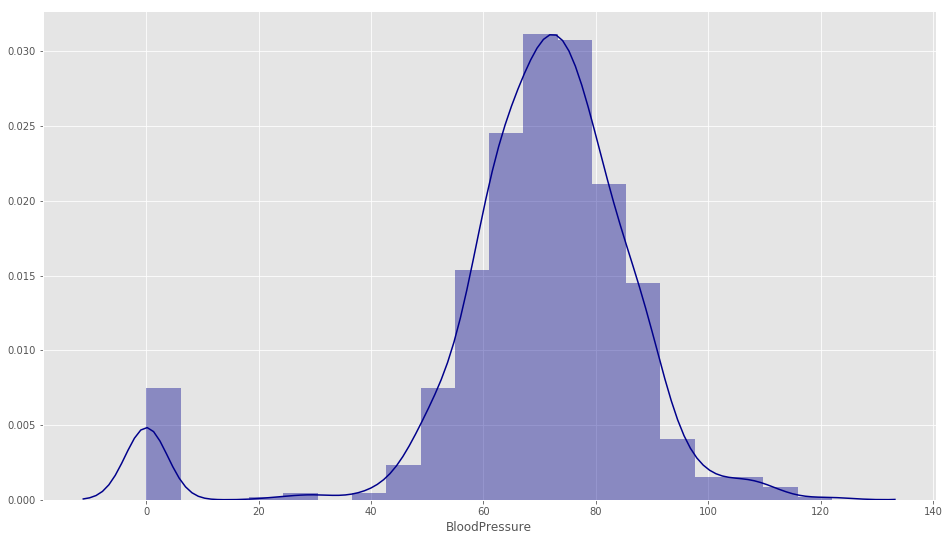

In [25]:
plt.figure(figsize=(16,9))
sns.distplot(df["BloodPressure"],color="darkblue",bins=20)

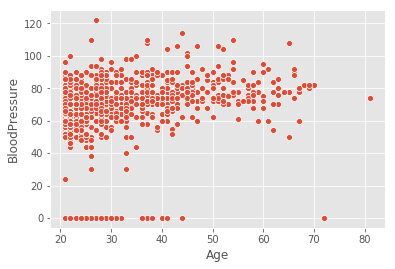

In [26]:
sns.scatterplot(x="Age",y="BloodPressure",data=df)

<h2>Apply Knowledge Of outlier Prediction</h2>
<div></div>There are one data point in Age range 20-30 this lady in particular must needs to be checked either her report is mis printed or she is seriously in trouble according to the data.

In [27]:
import cufflinks as cf 
cf.go_offline()

In [28]:
df["Glucose"].iplot(kind="hist",color="green")

can someone's glucose level be zero I have no idea about that. 

In [29]:
df["Outcome"][df["Glucose"]<10]

75     0
182    0
342    0
349    1
502    1
Name: Outcome, dtype: int64

There are diabetes patients with glucose level less than 10 any doctors in the panel.

In [33]:
df.iloc[[349,502]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


* with zero knowledge about doctoring I am going to discard this two row from dataset.

<div></div>
<h2>Distribution Plots:</h2>

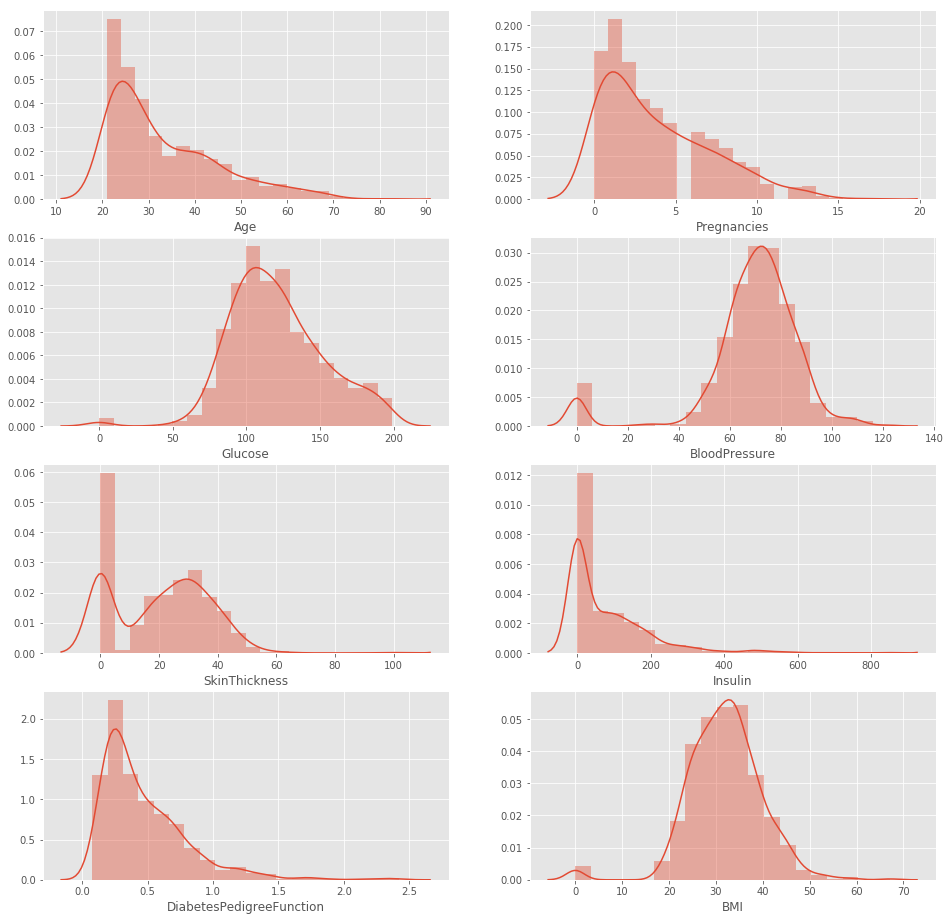

In [34]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

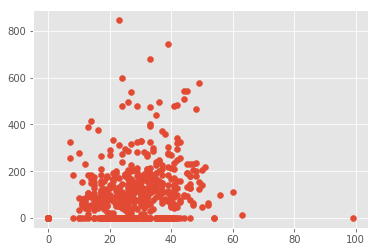

In [35]:
plt.scatter(df["SkinThickness"],df["Insulin"])

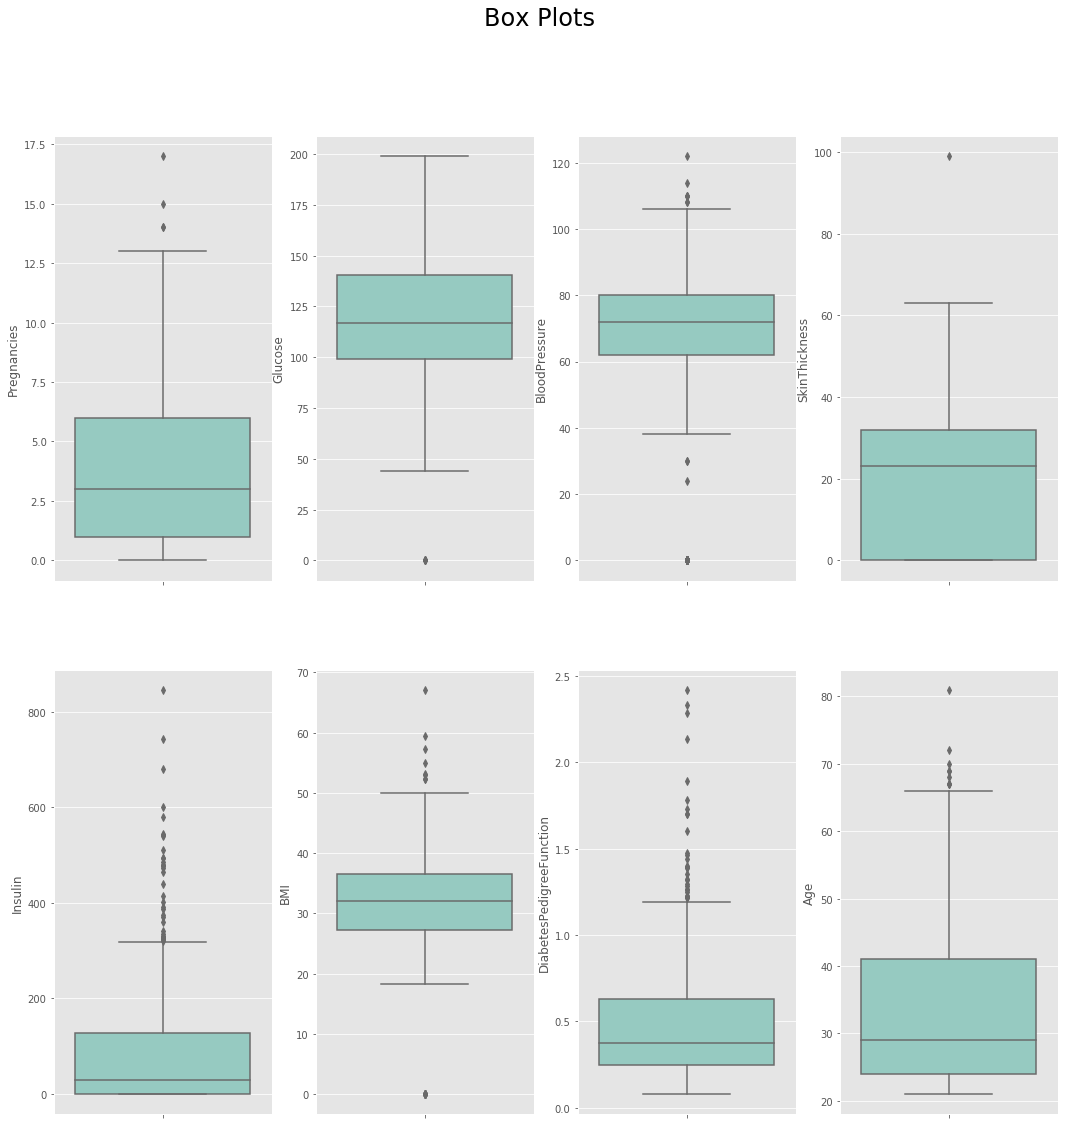

In [39]:


fig,ax = plt.subplots(nrows=2, ncols=4, figsize=(18,18))
plt.suptitle('Box Plots',fontsize=24)
sns.boxplot(y="Pregnancies", data=df,ax=ax[0,0],palette='Set3')
sns.boxplot(y="Glucose", data=df,ax=ax[0,1],palette='Set3')
sns.boxplot (y ='BloodPressure', data=df, ax=ax[0,2], palette='Set3')
sns.boxplot(y='SkinThickness', data=df, ax=ax[0,3],palette='Set3')
sns.boxplot(y='Insulin', data=df, ax=ax[1,0], palette='Set3')
sns.boxplot(y='BMI', data=df, ax=ax[1,1],palette='Set3')
sns.boxplot(y='DiabetesPedigreeFunction', data=df, ax=ax[1,2],palette='Set3')
sns.boxplot(y='Age', data=df, ax=ax[1,3],palette='Set3')
plt.show()

In [40]:
new_df=df.copy()

In [41]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
final_df=new_df.drop([349,502],axis=0)

I Think we don't need pregnancy and skinthickness so drop it 

In [49]:
Feature=['Glucose', 'BloodPressure',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [50]:
X=df[Feature].values
y= df['Outcome'].values

<h1>Model</h1>

In [51]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [53]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
     #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

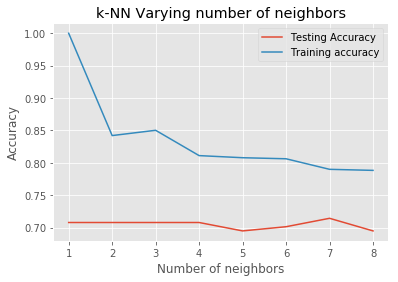

In [54]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [55]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [56]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [57]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7142857142857143

In [59]:
y_pred = knn.predict(X_test)

In [60]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       100
           1       0.60      0.54      0.57        54

   micro avg       0.71      0.71      0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154



In [61]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [62]:
from sklearn.metrics import roc_curve

In [63]:
fr, tr, thresholds = roc_curve(y_test, y_pred_proba)

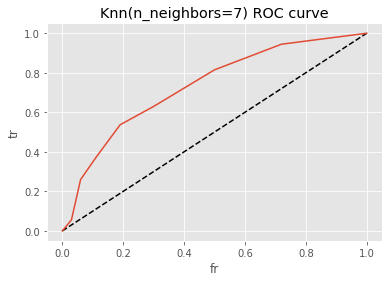

In [64]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fr,tr, label='Knn')
plt.xlabel('fr')
plt.ylabel('tr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [65]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7319444444444445

<h2>Cross-Validation</h2>

In [66]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [67]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [68]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
knn_cv.best_score_,knn_cv.best_params_

(0.765625, {'n_neighbors': 16})

In [70]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=16)
#Fit the model
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1]

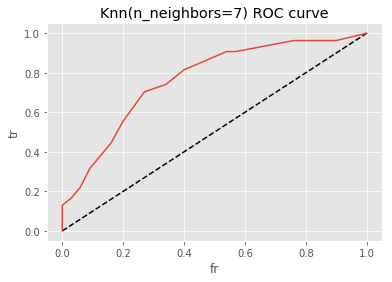

In [71]:
fr, tr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fr,tr, label='Knn')
plt.xlabel('fr')
plt.ylabel('tr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [72]:
roc_auc_score(y_test,y_pred_proba)

0.7646296296296295

<h2>Thank You </h2>